## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.5


## Import Libraries

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
tf.random.set_seed(1234)

In [4]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

## Data Import and Manipulation

In [5]:
train_df = pd.read_csv("H1full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [6]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [7]:
df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [8]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [9]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
40055,0.0
40056,0.0
40057,0.0
40058,0.0


In [10]:
type(df1)

pandas.core.frame.DataFrame

In [11]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [12]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
1,201527,0.0
2,201527,0.0
3,201527,0.0
4,201527,0.0
...,...,...
13799,201735,1.0
13800,201735,1.0
13801,201735,1.0
13802,201735,1.0


In [13]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [14]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     41.0
201528     48.0
201529     87.0
201530     74.0
201531    101.0
          ...  
201731    173.0
201732    140.0
201733    182.0
201734    143.0
201735    100.0
Name: IsCanceled, Length: 115, dtype: float64

In [15]:
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.914054
p-value: 0.043738
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


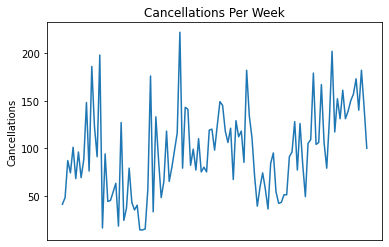

In [16]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [17]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [18]:
df = df[:100]

In [19]:
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201716,104.0
201717,106.0
201718,167.0


### Form dataset matrix

In [20]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201716,104.0
201717,106.0
201718,167.0


## Normalize dataset with MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.12980769],
       [0.16346154],
       [0.35096154],
       [0.28846154],
       [0.41826923],
       [0.25961538],
       [0.39423077],
       [0.26442308],
       [0.35576923],
       [0.64423077],
       [0.29807692],
       [0.82692308],
       [0.52403846],
       [0.37019231],
       [0.88461538],
       [0.00961538],
       [0.38461538],
       [0.14423077],
       [0.14903846],
       [0.19230769],
       [0.23557692],
       [0.01923077],
       [0.54326923],
       [0.04807692],
       [0.11057692],
       [0.3125    ],
       [0.13942308],
       [0.10096154],
       [0.125     ],
       [0.        ],
       [0.        ],
       [0.00480769],
       [0.20673077],
       [0.77884615],
       [0.09134615],
       [0.57211538],
       [0.35576923],
       [0.16346154],
       [0.24519231],
       [0.5       ],
       [0.24519231],
       [0.31730769],
       [0.40384615],
       [0.49038462],
       [1.        ],
       [0.3125    ],
       [0.62019231],
       [0.610

In [23]:
# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [24]:
X_train

array([[0.12980769, 0.16346154, 0.35096154, 0.28846154, 0.41826923],
       [0.16346154, 0.35096154, 0.28846154, 0.41826923, 0.25961538],
       [0.35096154, 0.28846154, 0.41826923, 0.25961538, 0.39423077],
       [0.28846154, 0.41826923, 0.25961538, 0.39423077, 0.26442308],
       [0.41826923, 0.25961538, 0.39423077, 0.26442308, 0.35576923],
       [0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077],
       [0.39423077, 0.26442308, 0.35576923, 0.64423077, 0.29807692],
       [0.26442308, 0.35576923, 0.64423077, 0.29807692, 0.82692308],
       [0.35576923, 0.64423077, 0.29807692, 0.82692308, 0.52403846],
       [0.64423077, 0.29807692, 0.82692308, 0.52403846, 0.37019231],
       [0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538],
       [0.82692308, 0.52403846, 0.37019231, 0.88461538, 0.00961538],
       [0.52403846, 0.37019231, 0.88461538, 0.00961538, 0.38461538],
       [0.37019231, 0.88461538, 0.00961538, 0.38461538, 0.14423077],
       [0.88461538, 0.00961538, 0.

In [25]:
Y_train

array([0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077,
       0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538,
       0.00961538, 0.38461538, 0.14423077, 0.14903846, 0.19230769,
       0.23557692, 0.01923077, 0.54326923, 0.04807692, 0.11057692,
       0.3125    , 0.13942308, 0.10096154, 0.125     , 0.        ,
       0.        , 0.00480769, 0.20673077, 0.77884615, 0.09134615,
       0.57211538, 0.35576923, 0.16346154, 0.24519231, 0.5       ,
       0.24519231, 0.31730769, 0.40384615, 0.49038462, 1.        ,
       0.3125    , 0.62019231, 0.61057692, 0.32692308, 0.40865385,
       0.30288462, 0.46153846, 0.29326923, 0.31730769, 0.29326923,
       0.50480769, 0.50961538, 0.40384615, 0.52884615, 0.64903846,
       0.62980769, 0.5       , 0.44230769, 0.51442308, 0.25480769,
       0.55288462, 0.47115385, 0.5       , 0.34134615, 0.80769231,
       0.57692308, 0.46634615, 0.26923077, 0.12019231, 0.21634615,
       0.28846154, 0.20673077, 0.10576923, 0.33653846])

## Configure LSTM model

Epoch 1/20
59/59 - 0s - loss: 0.0900 - val_loss: 0.0430
Epoch 2/20
59/59 - 0s - loss: 0.0600 - val_loss: 0.0327
Epoch 3/20
59/59 - 0s - loss: 0.0523 - val_loss: 0.0332
Epoch 4/20
59/59 - 0s - loss: 0.0503 - val_loss: 0.0345
Epoch 5/20
59/59 - 0s - loss: 0.0500 - val_loss: 0.0348
Epoch 6/20
59/59 - 0s - loss: 0.0493 - val_loss: 0.0339
Epoch 7/20
59/59 - 0s - loss: 0.0487 - val_loss: 0.0344
Epoch 8/20
59/59 - 0s - loss: 0.0482 - val_loss: 0.0333
Epoch 9/20
59/59 - 0s - loss: 0.0479 - val_loss: 0.0348
Epoch 10/20
59/59 - 0s - loss: 0.0477 - val_loss: 0.0338
Epoch 11/20
59/59 - 0s - loss: 0.0467 - val_loss: 0.0332
Epoch 12/20
59/59 - 0s - loss: 0.0469 - val_loss: 0.0334
Epoch 13/20
59/59 - 0s - loss: 0.0467 - val_loss: 0.0341
Epoch 14/20
59/59 - 0s - loss: 0.0468 - val_loss: 0.0328
Epoch 15/20
59/59 - 0s - loss: 0.0455 - val_loss: 0.0336
Epoch 16/20
59/59 - 0s - loss: 0.0455 - val_loss: 0.0341
Epoch 17/20
59/59 - 0s - loss: 0.0451 - val_loss: 0.0330
Epoch 18/20
59/59 - 0s - loss: 0.0447 - 

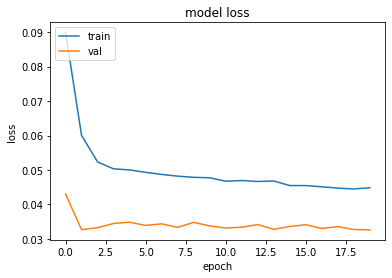

In [26]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=1, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [28]:
trainpred

array([[0.3215823 ],
       [0.31417784],
       [0.36324587],
       [0.33181378],
       [0.35984743],
       [0.3869952 ],
       [0.37591544],
       [0.46419215],
       [0.44193903],
       [0.48450175],
       [0.4797964 ],
       [0.43590906],
       [0.43243054],
       [0.3203495 ],
       [0.34621626],
       [0.24165499],
       [0.28310347],
       [0.21718305],
       [0.3127226 ],
       [0.2454654 ],
       [0.26239026],
       [0.2629845 ],
       [0.2820602 ],
       [0.222487  ],
       [0.23119816],
       [0.2151818 ],
       [0.18030173],
       [0.16523004],
       [0.19792587],
       [0.30422252],
       [0.24430704],
       [0.37741634],
       [0.35477087],
       [0.3924438 ],
       [0.30328965],
       [0.37300023],
       [0.3233993 ],
       [0.32872394],
       [0.347504  ],
       [0.39300323],
       [0.46190646],
       [0.43124673],
       [0.51044416],
       [0.46612468],
       [0.49944463],
       [0.41573194],
       [0.4050945 ],
       [0.412

In [29]:
valpred

array([[0.24379511],
       [0.27927005],
       [0.30316126],
       [0.3644994 ],
       [0.35146418],
       [0.4206523 ],
       [0.38645926],
       [0.37267765],
       [0.3612584 ],
       [0.37873846],
       [0.43769202],
       [0.4091006 ],
       [0.4653093 ],
       [0.47184637]], dtype=float32)

In [30]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [31]:
Y_train.shape

(1, 74)

In [32]:
Y_val.shape

(1, 14)

In [33]:
X_train.shape

(74, 1, 5)

In [34]:
X_val.shape

(14, 1, 5)

In [35]:
Y_train

array([[ 68.,  96.,  69.,  88., 148.,  76., 186., 123.,  91., 198.,  16.,
         94.,  44.,  45.,  54.,  63.,  18., 127.,  24.,  37.,  79.,  43.,
         35.,  40.,  14.,  14.,  15.,  57., 176.,  33., 133.,  88.,  48.,
         65., 118.,  65.,  80.,  98., 116., 222.,  79., 143., 141.,  82.,
         99.,  77., 110.,  75.,  80.,  75., 119., 120.,  98., 124., 149.,
        145., 118., 106., 121.,  67., 129., 112., 118.,  85., 182., 134.,
        111.,  70.,  39.,  59.,  74.,  57.,  36.,  84.]])

In [36]:
Y_val

array([[ 91.,  96., 128.,  77., 126.,  83.,  49., 105., 109., 179., 104.,
        106., 167., 106.]])

In [37]:
X_train

array([[[0.12980769, 0.16346154, 0.35096154, 0.28846154, 0.41826923]],

       [[0.16346154, 0.35096154, 0.28846154, 0.41826923, 0.25961538]],

       [[0.35096154, 0.28846154, 0.41826923, 0.25961538, 0.39423077]],

       [[0.28846154, 0.41826923, 0.25961538, 0.39423077, 0.26442308]],

       [[0.41826923, 0.25961538, 0.39423077, 0.26442308, 0.35576923]],

       [[0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077]],

       [[0.39423077, 0.26442308, 0.35576923, 0.64423077, 0.29807692]],

       [[0.26442308, 0.35576923, 0.64423077, 0.29807692, 0.82692308]],

       [[0.35576923, 0.64423077, 0.29807692, 0.82692308, 0.52403846]],

       [[0.64423077, 0.29807692, 0.82692308, 0.52403846, 0.37019231]],

       [[0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538]],

       [[0.82692308, 0.52403846, 0.37019231, 0.88461538, 0.00961538]],

       [[0.52403846, 0.37019231, 0.88461538, 0.00961538, 0.38461538]],

       [[0.37019231, 0.88461538, 0.00961538, 0.38461538, 0.14423

In [38]:
X_val

array([[[0.19230769, 0.13461538, 0.13942308, 0.17788462, 0.17788462]],

       [[0.13461538, 0.13942308, 0.17788462, 0.17788462, 0.37019231]],

       [[0.13942308, 0.17788462, 0.17788462, 0.37019231, 0.39423077]],

       [[0.17788462, 0.17788462, 0.37019231, 0.39423077, 0.54807692]],

       [[0.17788462, 0.37019231, 0.39423077, 0.54807692, 0.30288462]],

       [[0.37019231, 0.39423077, 0.54807692, 0.30288462, 0.53846154]],

       [[0.39423077, 0.54807692, 0.30288462, 0.53846154, 0.33173077]],

       [[0.54807692, 0.30288462, 0.53846154, 0.33173077, 0.16826923]],

       [[0.30288462, 0.53846154, 0.33173077, 0.16826923, 0.4375    ]],

       [[0.53846154, 0.33173077, 0.16826923, 0.4375    , 0.45673077]],

       [[0.33173077, 0.16826923, 0.4375    , 0.45673077, 0.79326923]],

       [[0.16826923, 0.4375    , 0.45673077, 0.79326923, 0.43269231]],

       [[0.4375    , 0.45673077, 0.79326923, 0.43269231, 0.44230769]],

       [[0.45673077, 0.79326923, 0.43269231, 0.44230769, 0.73557

In [39]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 42.33 RMSE
Validation Score: 37.03 RMSE


In [40]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [41]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

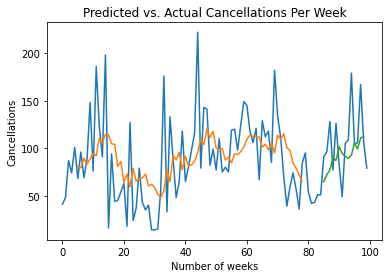

In [42]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.show()

In [43]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [44]:
Y_val

0      91.0
1      96.0
2     128.0
3      77.0
4     126.0
5      83.0
6      49.0
7     105.0
8     109.0
9     179.0
10    104.0
11    106.0
12    167.0
13    106.0
dtype: float64

In [45]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [46]:
predictions

0      64.709381
1      72.088165
2      77.057541
3      89.815872
4      87.104546
5     101.495674
6      94.383522
7      91.516953
8      89.141739
9      92.777596
10    105.039940
11     99.092918
12    110.784332
13    112.144043
dtype: float32

In [47]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [48]:
mda(Y_val, predictions)

0.8571428571428571

In [49]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 37.027161


In [50]:
forecast_error = (predictions-Y_val)
forecast_error

0    -26.290619
1    -23.911835
2    -50.942459
3     12.815872
4    -38.895454
5     18.495674
6     45.383522
7    -13.483047
8    -19.858261
9    -86.222404
10     1.039940
11    -6.907082
12   -56.215668
13     6.144043
dtype: float64

In [51]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-17.060555594308035

In [52]:
X_train

array([[[0.12980769, 0.16346154, 0.35096154, 0.28846154, 0.41826923]],

       [[0.16346154, 0.35096154, 0.28846154, 0.41826923, 0.25961538]],

       [[0.35096154, 0.28846154, 0.41826923, 0.25961538, 0.39423077]],

       [[0.28846154, 0.41826923, 0.25961538, 0.39423077, 0.26442308]],

       [[0.41826923, 0.25961538, 0.39423077, 0.26442308, 0.35576923]],

       [[0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077]],

       [[0.39423077, 0.26442308, 0.35576923, 0.64423077, 0.29807692]],

       [[0.26442308, 0.35576923, 0.64423077, 0.29807692, 0.82692308]],

       [[0.35576923, 0.64423077, 0.29807692, 0.82692308, 0.52403846]],

       [[0.64423077, 0.29807692, 0.82692308, 0.52403846, 0.37019231]],

       [[0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538]],

       [[0.82692308, 0.52403846, 0.37019231, 0.88461538, 0.00961538]],

       [[0.52403846, 0.37019231, 0.88461538, 0.00961538, 0.38461538]],

       [[0.37019231, 0.88461538, 0.00961538, 0.38461538, 0.14423

In [53]:
X_train.shape

(74, 1, 5)

## Validate Predictions on Test Data

In [54]:
# Test (unseen) predictions
# (t) and (t-5)
Xnew = np.array([[130,202,117,152,131],[202,117,152,131,161],[117,152,131,161,131],[152,131,161,131,139],[131,161,131,139,150],[161,131,139,150,157],[131,139,150,157,173],[139,150,157,173,140],[150,157,173,140,182],[157,173,140,182,143]])

In [55]:
Xnew

array([[130, 202, 117, 152, 131],
       [202, 117, 152, 131, 161],
       [117, 152, 131, 161, 131],
       [152, 131, 161, 131, 139],
       [131, 161, 131, 139, 150],
       [161, 131, 139, 150, 157],
       [131, 139, 150, 157, 173],
       [139, 150, 157, 173, 140],
       [150, 157, 173, 140, 182],
       [157, 173, 140, 182, 143]])

In [56]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [57]:
Xnew.shape

(10, 5)

In [58]:
ynew

array([[0.27727354],
       [0.45804977],
       [0.25362176],
       [0.3388384 ],
       [0.3194186 ],
       [0.40099186],
       [0.4551957 ],
       [0.40919757],
       [0.54847217],
       [0.45020878]], dtype=float32)

In [59]:
type(ynew)

numpy.ndarray

In [60]:
ynew.shape

(10, 1)

In [61]:
actual = np.array([[161,131,139,150,157,173,140,182,143,100]])

In [62]:
actual=actual.reshape(10,-1)
actual.shape

(10, 1)

In [63]:
actual

array([[161],
       [131],
       [139],
       [150],
       [157],
       [173],
       [140],
       [182],
       [143],
       [100]])

In [64]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [65]:
np.min(df)

0.0

In [66]:
ynew

array([0.27727354, 0.45804977, 0.25362176, 0.3388384 , 0.3194186 ,
       0.40099186, 0.4551957 , 0.40919757, 0.54847217, 0.45020878],
      dtype=float32)

In [67]:
maxcancel=np.max(tseries)

In [68]:
mincancel=np.min(tseries)

In [69]:
ynew = ynew * np.abs(maxcancel-mincancel) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [70]:
actualpd

0    161
1    131
2    139
3    150
4    157
5    173
6    140
7    182
8    143
9    100
dtype: int64

In [71]:
ynewpd

0     71.672897
1    109.274353
2     66.753326
3     84.478386
4     80.439072
5     97.406303
6    108.680702
7     99.113098
8    128.082214
9    107.643425
dtype: float32

In [72]:
mda(actualpd, ynewpd)

0.8

In [73]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 61.377586


In [74]:
forecast_error = (ynewpd-actualpd)
forecast_error

0   -89.327103
1   -21.725647
2   -72.246674
3   -65.521614
4   -76.560928
5   -75.593697
6   -31.319298
7   -82.886902
8   -14.917786
9     7.643425
dtype: float64

In [75]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-52.24562225341797

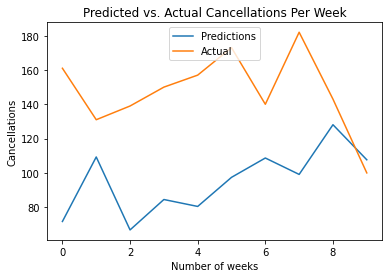

In [76]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()